In [3]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [4]:
start = dt.datetime(2017, 1, 3)
end = dt.datetime(2017, 11, 20)

prices = web.DataReader('TSLA', 'yahoo', start, end)['Close']
returns = prices.pct_change()
prices 

Date
2017-01-03    43.397999
2017-01-04    45.397999
2017-01-05    45.349998
2017-01-06    45.801998
2017-01-09    46.256001
                ...    
2017-11-14    61.740002
2017-11-15    62.259998
2017-11-16    62.500000
2017-11-17    63.009998
2017-11-20    61.748001
Name: Close, Length: 224, dtype: float64

In [8]:

last_price = prices[-1]
last_price

#Number of Simulations
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()
last_price

61.74800109863281

In [9]:
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series

/tmp/ipykernel_14991/2518755692.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series


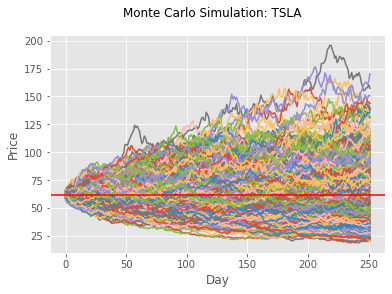

In [10]:
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: TSLA')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()